# 4. Logistic Regression


## 4.1 The Logistic Regression model
The logistic regression model has a linear form for the logit of the success probability
- logit link function 

$$
logit(\pi(x)) = \log \frac{\pi(x)}{1 - \pi(x)} = \alpha + \beta^T X 
$$

where 
- $\pi(x)$ is the probability of 'success'
- $X$ is a $n \times m$ matrix with $n$ observations for $m$ explanatory variables 

Consider a single explanatory variable $x$ (column of $X$) and its corresponding 'effect parameter' $\beta$
$$
\pi(x) = \frac{e^{\alpha + \beta x}}{1 + e^{\alpha + \beta x}}
$$

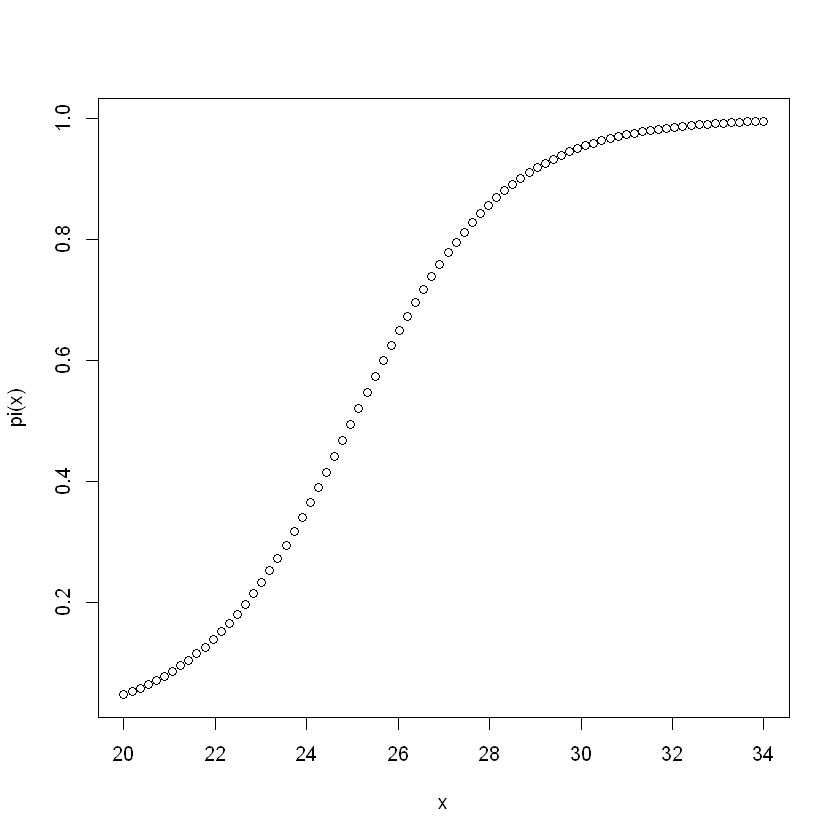

In [22]:
single_pix <- function(x, a, b) {
    y <- exp(a+b*x)
    return(y/(1+y))
}

x <- seq(20, 34, length.out=80)
y <- lapply(x, single_pix, a=-15, b=0.6)
plot(x, y, type="p", ylab="pi(x)")

In [3]:
library(RColorBrewer)

Crabs <- read.table("http://users.stat.ufl.edu/~aa/cat/data/Crabs.dat",
  header = TRUE
)

colors <- brewer.pal(n = 4, name = "Dark2")
head(Crabs)

,crab,sat,y,weight,width,color,spine
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,8,1,3.05,28.3,2,3
2,2,0,0,1.55,22.5,3,3
3,3,9,1,2.30,26.0,1,1
4,4,0,0,2.10,24.8,3,3
5,5,4,1,2.60,26.0,3,3
6,6,0,0,2.10,23.8,2,3


In [5]:
summary(Crabs)

      crab          sat               y              weight          width     
 Min.   :  1   Min.   : 0.000   Min.   :0.0000   Min.   :1.200   Min.   :21.0  
 1st Qu.: 44   1st Qu.: 0.000   1st Qu.:0.0000   1st Qu.:2.000   1st Qu.:24.9  
 Median : 87   Median : 2.000   Median :1.0000   Median :2.350   Median :26.1  
 Mean   : 87   Mean   : 2.919   Mean   :0.6416   Mean   :2.437   Mean   :26.3  
 3rd Qu.:130   3rd Qu.: 5.000   3rd Qu.:1.0000   3rd Qu.:2.850   3rd Qu.:27.7  
 Max.   :173   Max.   :15.000   Max.   :1.0000   Max.   :5.200   Max.   :33.5  
     color           spine      
 Min.   :1.000   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000  
 Median :2.000   Median :3.000  
 Mean   :2.439   Mean   :2.486  
 3rd Qu.:3.000   3rd Qu.:3.000  
 Max.   :4.000   Max.   :3.000  

We let $y=1$ if a female crab has at least one satellite (`sat`) and $y=0$ otherwise. 
We use the column `width`, a continuous variable, as the only explanatory variable. 
- `width` $\in [21, 33.5]$ 
- `sat` $\in [0, 15]$ 

In [19]:
library(gam, help, pos = 2, lib.loc = NULL)
gam.fit <- gam(y ~ s(width), family=binomial, data=Crabs) # s indicates a 'smooth function'
fit <- glm(y ~ width, family=binomial, data=Crabs)

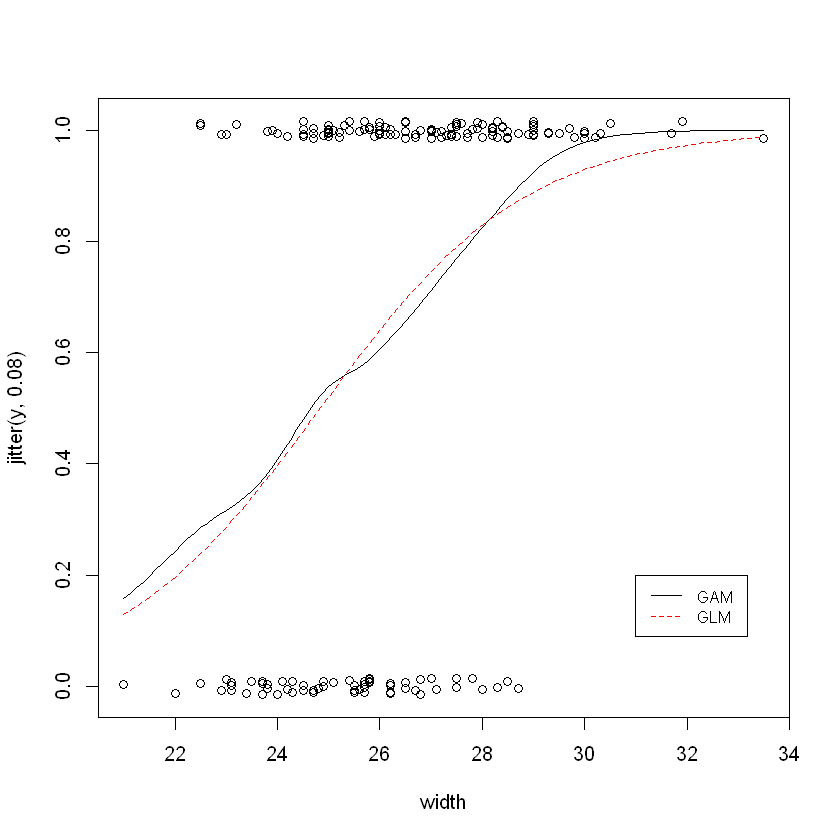

In [18]:
# jitter(x, f) adds noise f to vector x 
plot(jitter(y, 0.08) ~ width, data=Crabs)

# curve(func, from, to)
# Draws a curve corresponding to a function over the interval [from, to]
y1 = curve(
    predict(
        gam.fit, data.frame(width=x), type="resp"
    ), add=TRUE # add to existing plot 
)

y2 = curve(
    predict(
        fit, data.frame(width=x), type="resp"
    ), col="red", add=TRUE, lty="dashed"
)

legend(
    31, 0.2, 
    legend=c("GAM", "GLM"), 
    col=c("black", "red"), 
    lty=c(1,2), 
    cex=0.8
)

In [20]:
summary(fit)


Call:
glm(formula = y ~ width, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0281  -1.0458   0.5480   0.9066   1.6942  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.3508     2.6287  -4.698 2.62e-06 ***
width         0.4972     0.1017   4.887 1.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 194.45  on 171  degrees of freedom
AIC: 198.45

Number of Fisher Scoring iterations: 4


The probability that a crab of width $x$ has a satellite is given by the logistic fit:
$$
logit(\pi(x)) = -12.351 + 0.497x
$$

For every 1cm increase in width $x$, we get a $\exp(0.497) = 1.64$ times increase in the probability of a satellite. 

Applying `single_pix`, we get $\pi(x) = 0.128$ as the probability that a 21cm-wide crab has a satellite.

The incremental rate of change in probability at a given point is 
$$
\begin{align}
\ln \frac{\pi(x)}{1 - \pi(x)} &= \alpha + \beta x \\
\ln \pi(x) &= \alpha + \beta x + \ln(1-\pi(x)) \\
\frac{\partial}{\partial x} \ln \pi(x) &= \beta - \frac{\pi'(x)}{1 - \pi(x)} \\
\pi'(x) \left(\frac{1}{\pi(x)} + \frac{1}{1-\pi(x)} \right) 
    &= \beta \\
\pi'(x) &= \beta \left( \frac{1 - \pi(x) + \pi(x) }{\pi(x) (1 - \pi(x))} \right)^{-1} \\
    &= \beta \pi(x) (1 - \pi(x))
\end{align}
$$
At 21cm, $\pi'(x) = 0.497(0.128)(1-0.128) = 0.055$. 

The median effective level is the value of $x$ for which $\pi(x) = 1/2$. Thus,
$$
\ln(1/2) = \alpha + \beta x + \ln(1/2) \implies 
x = -\alpha/\beta 
$$
which gives $x_{median} = -(-12.351/0.497) = 24.8$. 

In [23]:
single_pix(21, -12.351, 0.497)

[1] 0.1285321

## 4.2 Statistical inference for logistic regression

### 4.2.1 Confidence intervals for the effects
Given a confidence interval $\mathcal{I} = [a,b]$ for $\beta$, $[e^a, e^b]$ are intervals for the multiplicative effect of an explanatory variable on the odds of 'success.'

- Wald confidence interval is $\beta \pm z_{\alpha/2} \sqrt{\sigma^2}$, where $\sigma$ is the standard error in $\beta$ (given by the column `Std. Error` in `summary(fit)`)
- When $n$ is small or probabilities near 0 or 1, profile likelihood confidence intervals are preferred over Wald CIs.


In [24]:
confint(fit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-17.8100090,-7.4572470
width,0.3083806,0.7090167


In [26]:
library(car)
car::Anova(fit)

Loading required package: carData



,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
width,31.30586,1,2.204134e-08


### Fitted values and confidence intervals for probabilities


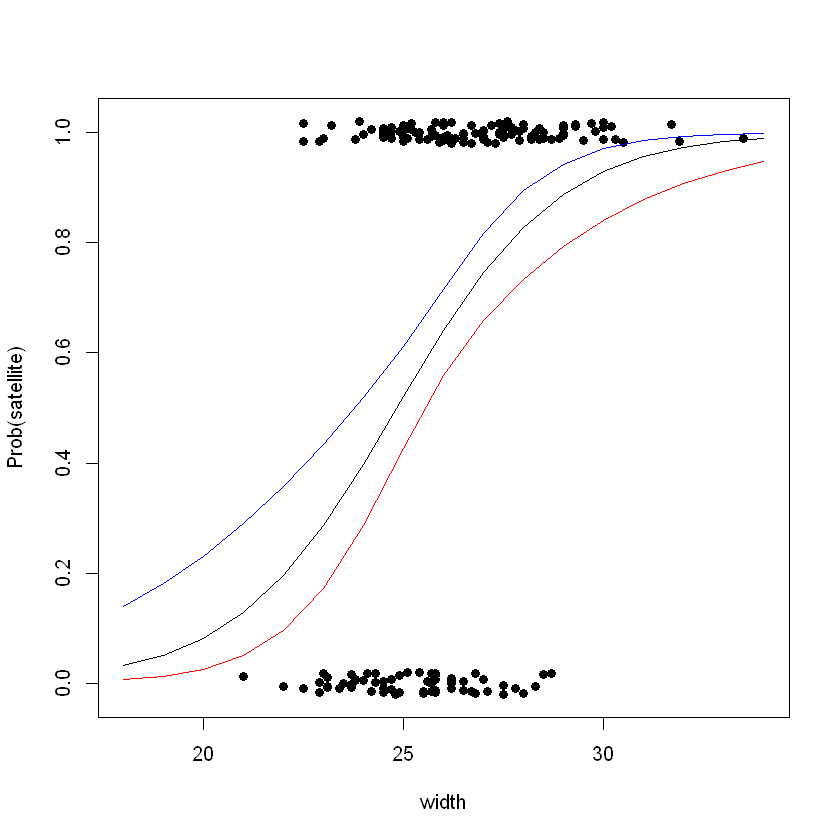

In [45]:

data.plot <- data.frame(width=(18:34))
lp <- predict(fit, newdata=data.plot, se.fit=TRUE)

q <- qnorm(0.975) * lp$se.fit
lower <- lp$fit - q 
upper <- lp$fit + q 
lower.p <- exp(lower) / (1+exp(lower))
upper.p <- exp(upper) / (1+exp(upper))

plot(
    jitter(y, 0.1) ~ width, 
    xlim=c(18, 34), 
    pch=16, 
    ylab="Prob(satellite)", 
    data=Crabs
)

pred.prob <- exp(lp$fit) / (1 + exp(lp$fit))
lines(18:34, pred.prob)
lines(18:34, lower.p, col="red")
lines(18:34, upper.p, col="blue")

## 4.3 Logistic regression with categorical predictors


In [47]:
library(tidyverse)
Marijuana <- read.table("http://users.stat.ufl.edu/~aa/cat/data/Marijuana.dat",
  header = TRUE, stringsAsFactors = TRUE
)
head(Marijuana)

,race,gender,yes,no
,<fct>,<fct>,<int>,<int>
1,white,female,420,620
2,white,male,483,579
3,other,female,25,55
4,other,male,32,62


In [51]:
fit <- glm(
    yes/(yes+no) ~ gender + race, 
    weights=yes+no,
    family=binomial,
    data=Marijuana
)
fitsum <- summary(fit)
fitsum 


Call:
glm(formula = yes/(yes + no) ~ gender + race, family = binomial, 
    data = Marijuana, weights = yes + no)

Deviance Residuals: 
       1         2         3         4  
-0.04513   0.04402   0.17321  -0.15493  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.83035    0.16854  -4.927 8.37e-07 ***
gendermale   0.20261    0.08519   2.378  0.01739 *  
racewhite    0.44374    0.16766   2.647  0.00813 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 12.752784  on 3  degrees of freedom
Residual deviance:  0.057982  on 1  degrees of freedom
AIC: 30.414

Number of Fisher Scoring iterations: 3


In [53]:
round(
    exp(fitsum$coefficients[2:3, "Estimate"]), 
    2
)

gendermale  racewhite 
      1.22       1.56

In [63]:
coefs <- as.data.frame(coef(fitsum))
coefs %>% 
    rownames_to_column(var = "Effect") %>%      # name index column 'Effect' 
    select("Effect", "Estimate") %>%            # select the 'Effect' and "Estimate" columns
    filter(Effect != "(Intercept)") %>%
    mutate("Odds Ratio" = exp(Estimate)) %>%    # Define new column 
    mutate_if(is.numeric, round, digits=2)      # apply rounding to all numeric cells 

Effect,Estimate,Odds Ratio
<chr>,<dbl>,<dbl>
gendermale,0.20,1.22
racewhite,0.44,1.56


In [64]:
car::Anova(fit)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
gender,5.666175,1,0.017295125
race,7.277030,1,0.006984192


## 4.4 Multiple logistic regression

Let $x$ be width and $\{c_i\}^4_{i=1}$ be colours that increase in darkness from 1 to 4. We first tream them as nominal, then as ordinal. When nominal, we can ignore one colour, since their associated probability can be figured out from the rest. 

$$
\begin{equation} 
  \mathrm{logit}[P(Y=1)] = \alpha + \beta_1 x + \beta_2 c_2 + \beta_3 c_3 + \beta_4 c_4.
  \tag{8}
\end{equation}
$$

- To consider a crab of a given colour, we could set $c_i = 1$ and $c_j = 0$ for all $i \neq j$. 
- The effect of weight $x$, $\beta_1$, is the same for all $c_i$. 

In [65]:
Crabs <- read.table("http://users.stat.ufl.edu/~aa/cat/data/Crabs.dat",
  header = TRUE, stringsAsFactors = TRUE
)
head(Crabs)

fit <- glm(y ~ width + factor(color), family = binomial, data = Crabs)
summary(fit)

,crab,sat,y,weight,width,color,spine
,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,1,8,1,3.05,28.3,2,3
2,2,0,0,1.55,22.5,3,3
3,3,9,1,2.30,26.0,1,1
4,4,0,0,2.10,24.8,3,3
5,5,4,1,2.60,26.0,3,3
6,6,0,0,2.10,23.8,2,3



Call:
glm(formula = y ~ width + factor(color), family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1124  -0.9848   0.5243   0.8513   2.1413  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -11.38519    2.87346  -3.962 7.43e-05 ***
width            0.46796    0.10554   4.434 9.26e-06 ***
factor(color)2   0.07242    0.73989   0.098    0.922    
factor(color)3  -0.22380    0.77708  -0.288    0.773    
factor(color)4  -1.32992    0.85252  -1.560    0.119    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 187.46  on 168  degrees of freedom
AIC: 197.46

Number of Fisher Scoring iterations: 4


### 4.4.2 Model comparison to check whether a term is needed. 
The test statistic $2(L_1 - L_0) \rightarrow^{(d)} \chi^2(n_1 - n_0)$, where
- $L_1$ and $L_0$ are maximized log likelihoods for two models with $n_1$ and $n_0$ parameters, resp.
- $n_1 > n_0$, so $L_0$ corresponds to a simpler model 

Computation
- $2(L_1 - L_0)$ is equivalent to the difference in deviances between the two models. 
- `cars::Anova` also computes the statistic as `LR Chisq` 

In [68]:
summary(
    glm(y ~ width, family=binomial, data=Crabs)
)


Call:
glm(formula = y ~ width, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0281  -1.0458   0.5480   0.9066   1.6942  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.3508     2.6287  -4.698 2.62e-06 ***
width         0.4972     0.1017   4.887 1.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 194.45  on 171  degrees of freedom
AIC: 198.45

Number of Fisher Scoring iterations: 4


In [67]:
car::Anova(fit)

,LR Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
width,24.603807,1,7.041249e-07
factor(color),6.995631,3,7.203714e-02


Thus, the difference between *residual deviances* of the models `y ~ width` and `y ~ width + factor(color)` is equivalent to the `LR Chisq` test statistic for `factor(color)`. 

We can also treat colour as an ordinal variable. In this case, we only have two explanatory variables, 
$$
logit(\pi(x)) = \alpha + \beta_1 x + \beta_2 c, \qquad 
c \in \{1,2,3,4\}
$$

In [70]:
Crabs$color

[1] 2 3 1 3 3 2 1 3 2 3 3 2 2 4 2 1 2 2 4 2 2 1 2 3 4 4 2 2 4 2 1 1 2 2 2 4 2
 [38] 2 4 2 3 1 1 2 3 3 2 2 2 2 4 2 1 2 2 2 2 3 2 4 3 3 3 2 2 2 2 2 2 2 3 3 3 2
 [75] 3 2 3 2 3 2 3 4 3 3 2 4 2 4 4 2 2 2 4 2 3 2 3 3 3 3 2 2 2 2 2 3 2 2 2 2 2
[112] 2 3 2 2 4 4 3 2 3 3 1 3 2 2 2 3 4 2 2 1 2 2 4 2 2 2 3 2 2 2 2 3 2 2 4 2 2
[149] 3 2 2 2 2 2 4 2 2 2 3 3 2 2 2 4 2 2 3 3 3 3 1 4 2

In [71]:
fit2 <- glm(
    y ~ width + color, family=binomial, data=Crabs 
)
summary(fit2)


Call:
glm(formula = y ~ width + color, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1692  -0.9889   0.5429   0.8700   1.9742  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -10.0708     2.8068  -3.588 0.000333 ***
width         0.4583     0.1040   4.406 1.05e-05 ***
color        -0.5090     0.2237  -2.276 0.022860 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 189.12  on 170  degrees of freedom
AIC: 195.12

Number of Fisher Scoring iterations: 4


To compare this model with the previous, which treated colours as nominal variables, we can use the `cars::anova` function to perform a likelihood ratio test between the two models

In [79]:
anova(fit2, fit, test="LRT")
anova(fit, fit2, test="LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,170,189.1212,NA,NA,NA
2,168,187.4570,2,1.664145,0.4351466


,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,168,187.4570,NA,NA,NA
2,170,189.1212,-2,-1.664145,0.4351466


The deviance between the two models is not large (1.66), and there is strong evidence of effect for ordinal colour. Thus, the simpler model is adequate. 

We also note that, in the model with nominal colouurs, the coefficients of colours 1-3 were similar to each other, but not the last:
```
Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -11.38519    2.87346  -3.962 7.43e-05 ***
width            0.46796    0.10554   4.434 9.26e-06 ***
factor(color)2   0.07242    0.73989   0.098    0.922    
factor(color)3  -0.22380    0.77708  -0.288    0.773    
factor(color)4  -1.32992    0.85252  -1.560    0.119  
```

Thus, we could try another color scoring using just $c_4$, ie the model would use $(c_1, c_2, c_3, c_4) = (0,0,0,1)$. 

In [81]:
# indicator for color 4
Crabs$c4 <- ifelse(Crabs$color == 4, 1, 0)

fit3 <- glm(y ~ width + c4, family=binomial, data=Crabs)
summary(fit3)


Call:
glm(formula = y ~ width + c4, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0821  -0.9932   0.5274   0.8606   2.1553  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -11.6790     2.6925  -4.338 1.44e-05 ***
width         0.4782     0.1041   4.592 4.39e-06 ***
c4           -1.3005     0.5259  -2.473   0.0134 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 187.96  on 170  degrees of freedom
AIC: 193.96

Number of Fisher Scoring iterations: 4


In [83]:
anova(fit3, fit, test="LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,170,187.9579,NA,NA,NA
2,168,187.4570,2,0.5008469,0.7784711


The small deviance with the full nominal colour model suggests that $y \sim \text{width} + c_4$ is also adequate. Each model suggests that darker-coloured crabs have lower probability of having satellites.

### 4.4.4 Allowing interaction between explanatory variables

We can add interaction terms to the model when we fit it with `glm`

In [85]:
fit_interaction <- glm(y ~ width + c4 + width:c4, family=binomial, data=Crabs)
summary(fit_interaction)


Call:
glm(formula = y ~ width + c4 + width:c4, family = binomial, data = Crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1366  -0.9344   0.4996   0.8554   1.7753  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -12.8117     2.9576  -4.332 1.48e-05 ***
width         0.5222     0.1146   4.556 5.21e-06 ***
c4            6.9578     7.3182   0.951    0.342    
width:c4     -0.3217     0.2857  -1.126    0.260    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 186.79  on 169  degrees of freedom
AIC: 194.79

Number of Fisher Scoring iterations: 4


In [87]:
anova(fit3, fit_interaction, test="LRT")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,170,187.9579,NA,NA,NA
2,169,186.7864,1,1.171525,0.2790881


The evidence of this interaction is weak $P=0.28$, but the sample size is also small $n=28$. 

## 4.5 Summarizing effects in logistic regression

### 4.5.1 Probability-based interpretations
We can find $P(Y=1)$ for different combinations of the explanatory variables $x_j$. 
- For each $x_j$, set the other $x_i$ to their means, find $x_j$, then compute $P(Y=1)$ 
  - this is problematic if $x_i = E[x_i]$ causes $x_j$ to take extreme values 
- alternatively, compute $P(Y=1)$ at the upper and lower quartiles of $x_j$, ie over the middle 50% of the range of $x_j$ 

In [92]:
m <- mean(Crabs$width)
predict(fit3, data.frame(c4=1, width=m), type="response")
predict(fit3, data.frame(c4=0, width=m), type="response")
predict(fit3, data.frame(c4=mean(Crabs$c4), width=quantile(Crabs$width)), type="resp")

1 
0.4006293

1 
0.7104701

0%       25%       50%       75%      100% 
0.1416394 0.5158264 0.6541188 0.8025564 0.9848731

### 4.5.2 Marginal effects and their average
- $\beta \pi(x) (1-\pi(x))$ = the rate of change in probability due to a 1-unit increase in $x$. 
- We can average this rate for the $n$ samples of the explanatory variables, which yields the *average marginal effect*

In [96]:
library(mfx)
fit3 <- glm(y ~ width + c4, family=binomial, data=Crabs)
logitmfx(fit3, atmean=FALSE, data=Crabs)

Call:
logitmfx(formula = fit3, data = Crabs, atmean = FALSE)

Marginal Effects:
          dF/dx Std. Err.       z     P>|z|    
width  0.087483  0.024472  3.5748 0.0003504 ***
c4    -0.261420  0.105690 -2.4735 0.0133809 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

dF/dx is for discrete change for the following variables:

[1] "c4"

The `dF/dx` values are rates of probability change:
- for a 1-cm increase in width, the probability of satellites goes up by 0.08
- for a 1-category increase in colour darkness, the probability goes *down* by 0.26

### 4.5.3 Standardized Interpretations
- Comparing effects like above is invalid when the variables have different units/scales. 
- We can standardize by replacing $x_j$ with $(x_j - E[x_j]) / \sigma_{x_j}$, and redo fitting
- Then, an increase of magnitude one corresponds to an increase of size $\sigma_{x_j}$ for every $x_j$

## 4.6 Summarizing predictive power with classification tables, ROC curves, and multiple correlation

### 4.6.1 Classification tables

A classification table is a table of predicted classifications:
- Use the model to compute probabilities $\{\hat{\pi}_i\}^n_{i=1}$ 
- To classify probabilities, ie determine whether $\hat{y}_i=0$ or $\hat{y}_i=1$, compare to a threshold $\pi_0$

$$\hat{y}_i = \begin{cases} 1 & \text{if } \quad  \hat{\pi}_i > \pi_0 \\ 0 & \text{else} \end{cases}$$

- At this point, we have a $(2 \times 1)$ table of predictions. We get a full classification table by comparing the predictions with the true data, obtaining true/false positive and negatives. 

How do we set $\pi_0$? 
- We can take $\pi_0 = 0.5$, but if the probability of success is low (e.g. some rare event), then the model may never predict a success. Similarly, if the probability of success is high, then the model may *always* predict $\hat{y}_i = 1$. 
- Alternatively, we set $\pi_0 = \frac{1}{n} \sum^n_i y_i \rightarrow E[Y]$, ie the sample average of successful outcomes 
  - note this is equivalent to $\hat{\pi}_i$ for a model that only has an intercept term 

In [97]:
prop <- sum(Crabs$y) / nrow(Crabs)      # sample proportions of y=1 outcomes 
prop 

[1] 0.6416185

In [102]:
fit <- glm(
    y ~ width + factor(color), family=binomial, data=Crabs
)

# predict y=1 when the model prediction is greater than `prop` 
predicted <- as.numeric(
    fitted(fit) > prop 
)

crossTable <- xtabs(~Crabs$y + predicted)
print("Setting pi0 = sample proportion")
ftable(crossTable)  # print crosstabs

[1] "Setting pi0 = sample proportion"


        predicted  0  1
Crabs$y                
0                 43 19
1                 36 75

In [104]:
print("Setting pi0 = 0.5")
predicted <- as.numeric(
    fitted(fit) > 0.5 
)

crossTable <- xtabs(~Crabs$y + predicted)
ftable(crossTable)  # print crosstabs

[1] "Setting pi0 = 0.5"


        predicted  0  1
Crabs$y                
0                 31 31
1                 15 96

### 4.6.2 ROC curves
- a receiver operating characteristic is a plot of specificity vs. sensitivity, for all possible cutoffs $\pi_0$ 
- since both variables are probabilities, the ROC curve has limits $[0,1]$ in both dimensions
- behaviour
  - as $\pi_0 \rightarrow 0$, nearly all predictions are failures, ie $\hat{y}_i=0$, so sensitivity goes down and specificity $\rightarrow 1$ 
  - as $\pi_0 \rightarrow 1$, nearly all predictions are successes, ie $$\hat{y}_i=1$, so sensitivity $\rightarrow 1$ and specificity goes to zero 
- the shape of the ROC curve is usually either concave or convex 
- for a given specificity, better predictive power $\iff$ higher sensitivity $\iff$ higher ROC 
- thus, the area under the ROC curve summarizes predictive power of a model 
- the area is aka **concordance index**
  - concordance = that an observation with large $y$ also has large $\pi$, ie $y \propto \pi$ 
  - eg concordance = 0.5 (the line $y=x$) implies that predictions were no better than chance 
  - a.k.a AUC (Area Under the Curve)


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7714

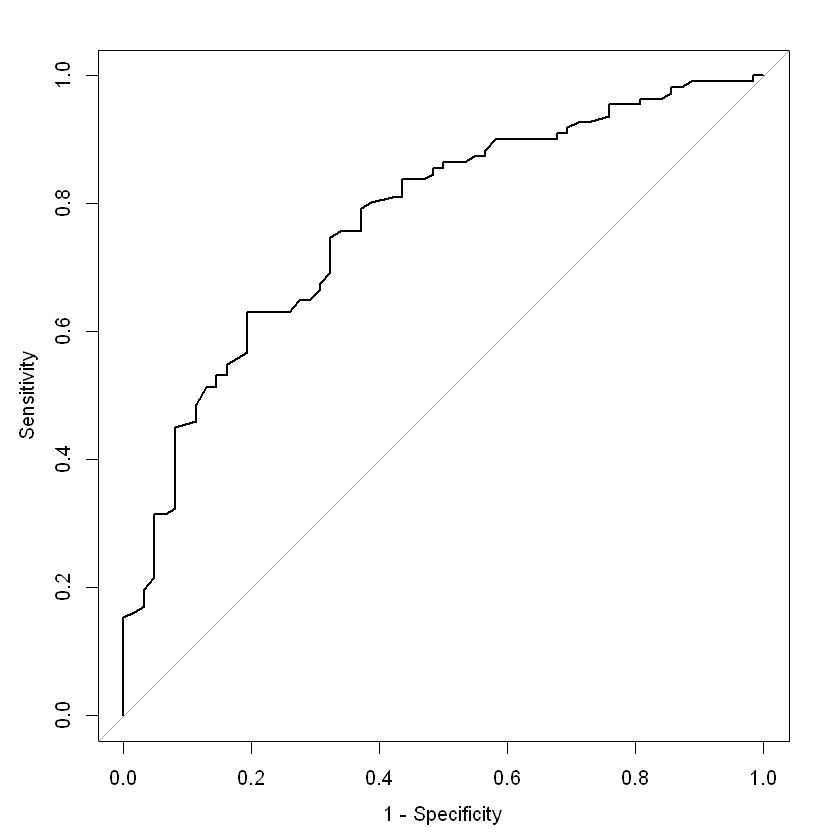

In [109]:
library(pROC)
rocplot <- roc(y ~ fitted(fit), data=Crabs)
plot.roc(rocplot, legacy.axes=TRUE)     #legacy.axes determines orientation of x/y axes 
auc(rocplot)                            # Area Under the Curve = AUC 

### 4.6.3 Multiple Correlation

- correlation $R$ between observed responses $\{y_i\}$ and fitted values $\{\hat{\mu}_i\}$ 
  - recall that a GLM models the conditional expectation $E[Y \mid X=x]$, or $\hat{\mu}$ 
- $R^2$ = proportion of variation in $y$ explained by the model (explanatory variables)
- discrete $y$ can limit/skew the range of values of $R$, esp when the data are unbalanced (eg more 1s than 0s), but this ultimately also depends on the values of $X$, as well 

In [110]:
cor(Crabs$y, fitted(fit))

[1] 0.4522131